# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt
!pip install ipywidgets
!pip install --upgrade pyzmq ipykernel jupyter-client jupyter-core traitlets
!pip install --upgrade jupyter ipywidgets
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 19.3 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 54.7 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 63.4 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 62.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 68.7 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 50.1 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.5 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=2df55d59706b4751ffd2f81fd226602b904036f03ddc18b5f54a5b1a820bc85a
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 908 kB 899 kB/s eta 0:00:01
     |████████████████████████████████| 138 kB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 65.2 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 59.4 MB/s eta 0:00:01
     |████████████████████████████████| 793 kB 63.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 36.6 MB/s eta 0:00:01
     |████████████████████████████████| 423 kB 70.8 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 67.7 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 67.9 MB/s eta 0:00:01


ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.0
    Uninstalling ipykernel-4.10.0:
      Successfully uninstalled ipykernel-4.10.0
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jupyter in /root/.local/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 139 kB 958 kB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 386 kB 73.

  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0
Defaulting to user installation because normal site-packages is not writeable


In [30]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [6]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import random_split
from torchvision import datasets
from torch.utils.data import DataLoader

In [31]:
import tqdm

In [36]:
device = torch.device('cuda')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [19]:

# Establish our transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load train and test datasets
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Split training data into training and validation
val_size = int(0.2 * len(training_data))
train_size = len(training_data) - val_size
train_data, val_data = random_split(training_data, [train_size, val_size])

# Create the training, validation, and test dataloaders with a batch size of 32
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)


## Justify your preprocessing
My above code incorporates preprocessing steps by defining a series of transformations that convert the images to tensors, flatten and normalize their pixel values. I chose and used these steps because, they are crucial for preparing the data for training a deep learning model in PyTorch. The dataset is quite simple and at the same time large hence there is no need to transform data based on colors or augumentation. The size of my data is not large, hence there's no need for resizing.

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [20]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Size of the training set: 48000
Size of the test set: 10000
Shape of training set: torch.Size([1, 28, 28])
Shape of test set: torch.Size([1, 28, 28])
0


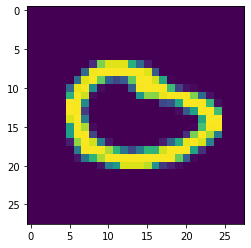

6


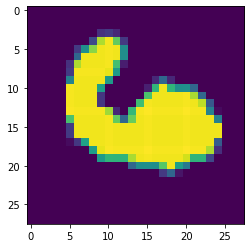

4


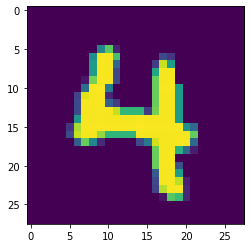

1


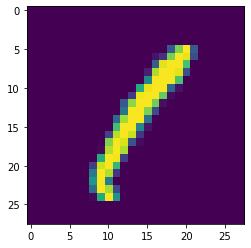

8


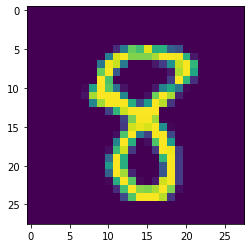

In [9]:
# Explore data
print("Size of the training set:", len(train_data))
print("Size of the test set:", len(test_data))
print("Shape of training set:", train_data[0][0].shape)
print("Shape of test set:", test_data[0][0].shape)
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [21]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        # Now representing our linear layer in the neural network with two arguments the input and output size,
        self.fc1 = nn.Linear(28*28 * 1, 128)
        self.fc2 = nn.Linear(128, 90)
        self.fc3 = nn.Linear(90,50)
        self.fc4 = nn.Linear(50, 10)


    def forward(self, x):
        x = x.view(-1, 784) # Flatten the input
        x = self.activation(self.fc1(x)) # Pass through the first linear layer and apply ReLU
        x = self.activation(self.fc2(x)) # Pass through the second linear layer and apply ReLU
        x = self.activation(self.fc3(x)) # Pass through the third linear layer and apply ReLU
        # Consider adding the final linear layer (fc4) and a softmax activation for classification tasks
        # x = F.softmax(self.fc4(x), dim=1)

        return x

# Instantiate the model now
model = Net()
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [22]:
eta = 0.01 # Learning rate

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=eta)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [23]:
num_epochs = 15

# Establishing a list for our history,
train_loss_history = list()
val_loss_history = list()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()  # Using sum() instead of mean()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    model.eval()
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()  # Using sum() instead of mean()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 47.78% training loss: 1.09189
Epoch 1 validation accuracy: 52.70% validation loss: 0.70655
Epoch 2 training accuracy: 53.71% training loss: 0.65082
Epoch 2 validation accuracy: 53.53% validation loss: 0.65291
Epoch 3 training accuracy: 54.74% training loss: 0.58446
Epoch 3 validation accuracy: 54.54% validation loss: 0.58662
Epoch 4 training accuracy: 55.33% training loss: 0.54613
Epoch 4 validation accuracy: 55.13% validation loss: 0.56182
Epoch 5 training accuracy: 55.76% training loss: 0.51971
Epoch 5 validation accuracy: 55.39% validation loss: 0.53365
Epoch 13 training accuracy: 62.87% training loss: 0.05514
Epoch 13 validation accuracy: 62.02% validation loss: 0.10208
Epoch 14 training accuracy: 63.03% training loss: 0.04979
Epoch 14 validation accuracy: 61.71% validation loss: 0.11422
Epoch 15 training accuracy: 63.04% training loss: 0.04582
Epoch 15 validation accuracy: 62.02% validation loss: 0.10457


Plot the training loss (and validation loss/accuracy, if recorded).

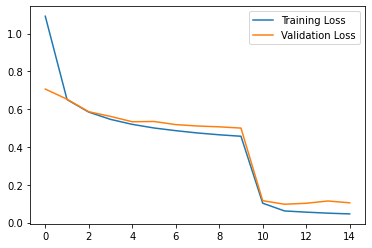

In [25]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [35]:
# Just to check if CUDA (GPU) is available

cuda_available = torch.cuda.is_available()

print(f"CUDA available: {cuda_available}")


# List all available CUDA devices

if cuda_available:

    num_cuda_devices = torch.cuda.device_count()

    print(f"Number of CUDA devices: {num_cuda_devices}")

    for i in range(num_cuda_devices):

        print(f"Device {i}: {torch.cuda.get_device_name(i)}")

else:

    print("No CUDA devices available.")


# Always print the CPU availability

print("CPU is available.")

CUDA available: True
Number of CUDA devices: 1
Device 0: Tesla T4
CPU is available.


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [38]:
# Let us initialize lists, so as to monitor test loss and accuracy

test_loss = 0.0

class_correct = list(0.0 for i in range(10))

class_total = list(0.0 for i in range(10))


model.eval()  # Preparing our model for evaluation
model.to(device)

for batch_idx, (data, target) in enumerate(test_loader): # Move data and target to the appropriate device 
    data, target = data.to(device), target.to(device)

    # Forward pass: To compute predicted outputs by passing inputs to the model

    output = model(data)

    # Calculate the loss now

    loss = criterion(output, target)

    # Update test loss now

    test_loss += loss.item() * data.size(0)

    # Convert output probabilities to predicted class

    _, pred = torch.max(output, 1)

    # Compare predictions to true label

    correct = np.squeeze(pred.eq(target.data.view_as(pred)))

    # Calculate test accuracy for each object class

    for i in range(data.shape[0]):

        label = target.data[i]

        class_correct[label] += correct[i].item()

        class_total[label] += 1


# Calculate and print average test loss

test_loss = test_loss / len(test_loader.dataset)

print(f"Test Loss: {test_loss:.6f}\n")


for i in range(10):

    if class_total[i] > 0:

        print(

            f"Test Accuracy of {i}: {100 * class_correct[i] / class_total[i]:.2f}% "

            f"({int(np.sum(class_correct[i]))}/{int(np.sum(class_total[i]))})"

        )

    else:

        print(f"Test Accuracy of {i}: N/A (no training examples)")


print(

    f"\nTest Accuracy (Overall): {100.0 * np.sum(class_correct) / np.sum(class_total):.2f}% "

    f"({int(np.sum(class_correct))}/{int(np.sum(class_total))})"

)

Test Loss: 0.105486

Test Accuracy of 0: 98.88% (969/980)
Test Accuracy of 1: 98.85% (1122/1135)
Test Accuracy of 2: 98.16% (1013/1032)
Test Accuracy of 3: 96.34% (973/1010)
Test Accuracy of 4: 98.37% (966/982)
Test Accuracy of 5: 94.73% (845/892)
Test Accuracy of 6: 96.97% (929/958)
Test Accuracy of 7: 94.16% (968/1028)
Test Accuracy of 8: 98.25% (957/974)
Test Accuracy of 9: 97.52% (984/1009)

Test Accuracy (Overall): 97.26% (9726/10000)


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128)
test_loader = DataLoader(test_data, batch_size=128)


In [58]:
# Starting by redefining my network architecture,
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 300)
        self.linear2 = nn.Linear(300, 200)
        self.linear3 = nn.Linear(200,100)
        self.linear4 = nn.Linear(100, 50)
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()

    def forward(self, img): # To convert & flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.relu(self.linear4(x))
        x = self.final(x)
        return x

# Instantiating the model now,
model = Net()
model.to(device)

Net(
  (linear1): Linear(in_features=784, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=200, bias=True)
  (linear3): Linear(in_features=200, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=50, bias=True)
  (final): Linear(in_features=50, out_features=10, bias=True)
  (relu): ReLU()
)

In [59]:
eta = 0.0001 # So as to avoid overfitting

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=eta)

In [60]:
num_epochs = 30

# Establishing a list for our history,
train_loss_history = list()
test_loss_history = list()
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()  # Using sum() instead of mean()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    test_loss = 0.0
    test_correct = 0
    model.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()  # Using sum() instead of mean()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')
    test_loss_history.append(test_loss/len(test_loader))

Epoch 1 training accuracy: 46.97% training loss: 0.87127
Epoch 1 test accuracy: 54.99% test loss: 0.45249
Epoch 2 training accuracy: 56.89% training loss: 0.38493
Epoch 2 test accuracy: 57.40% test loss: 0.33354
Epoch 3 training accuracy: 58.37% training loss: 0.30005
Epoch 3 test accuracy: 58.78% test loss: 0.26027
Epoch 4 training accuracy: 59.35% training loss: 0.24815
Epoch 4 test accuracy: 59.15% test loss: 0.23429
Epoch 5 training accuracy: 60.11% training loss: 0.20869
Epoch 5 test accuracy: 59.73% test loss: 0.20484
Epoch 6 training accuracy: 60.60% training loss: 0.17966
Epoch 6 test accuracy: 60.29% test loss: 0.17684
Epoch 7 training accuracy: 61.03% training loss: 0.15676
Epoch 7 test accuracy: 60.81% test loss: 0.15040
Epoch 8 training accuracy: 61.35% training loss: 0.13769
Epoch 8 test accuracy: 60.76% test loss: 0.14881
Epoch 9 training accuracy: 61.70% training loss: 0.12304
Epoch 9 test accuracy: 61.12% test loss: 0.13776
Epoch 10 training accuracy: 61.91% training lo

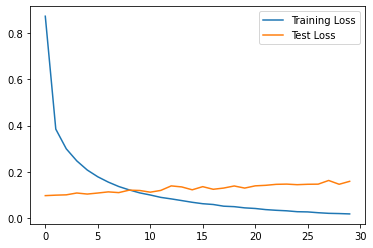

In [61]:
# Finally, plotting the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Test Loss")
plt.legend()
plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [62]:
import os

# The path of our code file
code_file_path = os.path.abspath("MNIST_Handwritten_Digits-STARTER.ipynb")

# The directory path of your code file
code_directory = os.path.dirname(code_file_path)

# Defining now the file path for saving the model
model_path = os.path.join(code_directory, 'model.pth')

# Finally, we save our model
torch.save(model.state_dict(), model_path)